In [55]:
import requests
from bs4 import BeautifulSoup
from datetime import date
import pandas as pd
#today = date.today()

my_dict = dict()

for i in range(1, 7):
    url = 'https://www.bbc.com/news/topics/c0311km5r1lt?'
    url = url+('page='+str(i))
    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = soup.find('body').find_all('h3')
    for x in headlines:
        content = x.text.strip()[(x.text.strip().index('r') + 1):x.text.strip().index(',')]
        content_date = x.text.strip()[0:(x.text.strip().index('r') + 1)]
        my_dict[content_date] = content
        df = pd.DataFrame(my_dict.values(), index = my_dict.keys(), columns = ['Text'])
df

,Text
04:12 24 November,Midterms results in maps and charts
03:53 24 November,Sarah Palin defeated again in Alaska comeback bid
02:02 19 November,Lauren Boebert's Democratic challenger concedes
01:35 18 November,Pelosi stands down as US House Democratic leader
00:13 18 November,What divided government means for Washington
...,...
13:08 24 September,Inflation's got her thinking she'd 'vote Trump...
19:04 20 September,US detentions at Mexico border pass two millio...
21:29 16 September,Why are migrants being sent to Democrat-run ar...
20:24 15 September,Texas sends migrants to vice-president's resid...


In [56]:
df = df.reset_index()

In [57]:
df = df.rename(columns = {'index': 'Date'})

In [58]:
df

,Date,Text
0,04:12 24 November,Midterms results in maps and charts
1,03:53 24 November,Sarah Palin defeated again in Alaska comeback bid
2,02:02 19 November,Lauren Boebert's Democratic challenger concedes
3,01:35 18 November,Pelosi stands down as US House Democratic leader
4,00:13 18 November,What divided government means for Washington
...,...,...
138,13:08 24 September,Inflation's got her thinking she'd 'vote Trump...
139,19:04 20 September,US detentions at Mexico border pass two millio...
140,21:29 16 September,Why are migrants being sent to Democrat-run ar...
141,20:24 15 September,Texas sends migrants to vice-president's resid...


In [59]:
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df

,Date,Text
0,2022-11-24 04:12:00,Midterms results in maps and charts
1,2022-11-24 03:53:00,Sarah Palin defeated again in Alaska comeback bid
2,2022-11-19 02:02:00,Lauren Boebert's Democratic challenger concedes
3,2022-11-18 01:35:00,Pelosi stands down as US House Democratic leader
4,2022-11-18 00:13:00,What divided government means for Washington
...,...,...
138,2022-09-24 13:08:00,Inflation's got her thinking she'd 'vote Trump...
139,2022-09-20 19:04:00,US detentions at Mexico border pass two millio...
140,2022-09-16 21:29:00,Why are migrants being sent to Democrat-run ar...
141,2022-09-15 20:24:00,Texas sends migrants to vice-president's resid...


# Before

In [61]:
dfb = df[df['Date'] < ('2022-11-08 00:00:00')].reset_index(drop = True)

In [62]:
#import pandas as pd
#import preprocessor as p
import matplotlib
import nltk
import re
import math
import string

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from datetime import datetime

In [63]:
def cleaner(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [64]:
dfb['Text'] = dfb['Text'].apply(lambda x: cleaner(x))

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
stop = stopwords.words('english')
dfb['Text'] = dfb['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [67]:
dfb

,Date,Text
0,2022-11-07 23:36:00,'Angry
1,2022-11-07 17:09:00,How follow live results BBC
2,2022-11-07 11:31:00,US midterms 2022: A simple guide
3,2022-11-07 23:00:00,Biden Trump make final pitches eve midterms
4,2022-11-07 06:18:00,President Biden appeals young voters rally. Video
...,...,...
66,2022-09-24 13:08:00,Inflation's got thinking she'd 'vote Trump again'
67,2022-09-20 19:04:00,US detentions Mexico border pass two million year
68,2022-09-16 21:29:00,Why migrants sent Democrat-run areas?
69,2022-09-15 20:24:00,Texas sends migrants vice-president's residence


In [68]:
for i in range(len(dfb)):
    dfb['Text'][i] = dfb['Text'][i].lower()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/2722287142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['Text'][i] = dfb['Text'][i].lower()


In [69]:
dfb

,Date,Text
0,2022-11-07 23:36:00,'angry
1,2022-11-07 17:09:00,how follow live results bbc
2,2022-11-07 11:31:00,us midterms 2022: a simple guide
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms
4,2022-11-07 06:18:00,president biden appeals young voters rally. video
...,...,...
66,2022-09-24 13:08:00,inflation's got thinking she'd 'vote trump again'
67,2022-09-20 19:04:00,us detentions mexico border pass two million year
68,2022-09-16 21:29:00,why migrants sent democrat-run areas?
69,2022-09-15 20:24:00,texas sends migrants vice-president's residence


In [70]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
dfb['Text']= dfb['Text'].apply(lambda x: remove_punct(x))

In [71]:
dfb

,Date,Text
0,2022-11-07 23:36:00,angry
1,2022-11-07 17:09:00,how follow live results bbc
2,2022-11-07 11:31:00,us midterms 2022 a simple guide
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms
4,2022-11-07 06:18:00,president biden appeals young voters rally video
...,...,...
66,2022-09-24 13:08:00,inflations got thinking shed vote trump again
67,2022-09-20 19:04:00,us detentions mexico border pass two million year
68,2022-09-16 21:29:00,why migrants sent democratrun areas
69,2022-09-15 20:24:00,texas sends migrants vicepresidents residence


In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
dfb['tokenized_text'] = 0
for i in range(len(dfb)):
    dfb['tokenized_text'][i] = word_tokenize(dfb['Text'][i])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/3355596729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['tokenized_text'][i] = word_tokenize(dfb['Text'][i])
C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [74]:
dfb

,Date,Text,tokenized_text
0,2022-11-07 23:36:00,angry,[angry]
1,2022-11-07 17:09:00,how follow live results bbc,"[how, follow, live, results, bbc]"
2,2022-11-07 11:31:00,us midterms 2022 a simple guide,"[us, midterms, 2022, a, simple, guide]"
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms,"[biden, trump, make, final, pitches, eve, midt..."
4,2022-11-07 06:18:00,president biden appeals young voters rally video,"[president, biden, appeals, young, voters, ral..."
...,...,...,...
66,2022-09-24 13:08:00,inflations got thinking shed vote trump again,"[inflations, got, thinking, shed, vote, trump,..."
67,2022-09-20 19:04:00,us detentions mexico border pass two million year,"[us, detentions, mexico, border, pass, two, mi..."
68,2022-09-16 21:29:00,why migrants sent democratrun areas,"[why, migrants, sent, democratrun, areas]"
69,2022-09-15 20:24:00,texas sends migrants vicepresidents residence,"[texas, sends, migrants, vicepresidents, resid..."


In [75]:
indices_to_drop = []
for i in range(len(dfb)):
    if len(dfb.tokenized_text[i]) == 0:
        indices_to_drop.append(dfb.index[i])

dfb = dfb.drop(indices_to_drop)
dfb = dfb.reset_index(drop = True)
dfb.head()

,Date,Text,tokenized_text
0,2022-11-07 23:36:00,angry,[angry]
1,2022-11-07 17:09:00,how follow live results bbc,"[how, follow, live, results, bbc]"
2,2022-11-07 11:31:00,us midterms 2022 a simple guide,"[us, midterms, 2022, a, simple, guide]"
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms,"[biden, trump, make, final, pitches, eve, midt..."
4,2022-11-07 06:18:00,president biden appeals young voters rally video,"[president, biden, appeals, young, voters, ral..."


In [76]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for dfb in dfb.tokenized_text for word in dfb],100)

[('us', 20),
 ('video', 11),
 ('trump', 10),
 ('biden', 9),
 ('midterms', 8),
 ('the', 7),
 ('election', 6),
 ('audio', 6),
 ('why', 6),
 ('pelosi', 6),
 ('attack', 6),
 ('elections', 5),
 ('vote', 5),
 ('how', 4),
 ('voters', 4),
 ('will', 4),
 ('abortion', 4),
 ('could', 4),
 ('paul', 4),
 ('2024', 3),
 ('midterm', 3),
 ('americast', 3),
 ('2022', 2),
 ('republican', 2),
 ('run', 2),
 ('crucial', 2),
 ('claims', 2),
 ('coming', 2),
 ('storm', 2),
 ('what', 2),
 ('change', 2),
 ('voting', 2),
 ('turnout', 2),
 ('hammer', 2),
 ('decide', 2),
 ('is', 2),
 ('georgia', 2),
 ('democracy', 2),
 ('five', 2),
 ('two', 2),
 ('alleged', 2),
 ('matter', 2),
 ('violent', 2),
 ('texas', 2),
 ('candidate', 2),
 ('migrants', 2),
 ('angry', 1),
 ('follow', 1),
 ('live', 1),
 ('results', 1),
 ('bbc', 1),
 ('simple', 1),
 ('guide', 1),
 ('make', 1),
 ('final', 1),
 ('pitches', 1),
 ('eve', 1),
 ('president', 1),
 ('appeals', 1),
 ('young', 1),
 ('rally', 1),
 ('social', 1),
 ('media', 1),
 ('fire', 1),

In [77]:
words = ['us', 'video', 'midterms', 'the', 'election', 'audio', 'why', 'elections', 'vote', 'how', 'voters', 
        'will', 'could', 'midterm', '2022', 'crucial', 'coming', 'voting', 'what', 'is', 'five', 'two', 'results', 
        'bbc', 'get', 'shown', 'on', 'still', 'she']

In [78]:
for i in range(len(dfb)):
    dfb.tokenized_text[i] = [x for x in dfb.tokenized_text[i] if x not in words]

dfb.head()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/438981727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb.tokenized_text[i] = [x for x in dfb.tokenized_text[i] if x not in words]


,Date,Text,tokenized_text
0,2022-11-07 23:36:00,angry,[angry]
1,2022-11-07 17:09:00,how follow live results bbc,"[follow, live]"
2,2022-11-07 11:31:00,us midterms 2022 a simple guide,"[a, simple, guide]"
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms,"[biden, trump, make, final, pitches, eve]"
4,2022-11-07 06:18:00,president biden appeals young voters rally video,"[president, biden, appeals, young, rally]"


In [79]:
dfb

,Date,Text,tokenized_text
0,2022-11-07 23:36:00,angry,[angry]
1,2022-11-07 17:09:00,how follow live results bbc,"[follow, live]"
2,2022-11-07 11:31:00,us midterms 2022 a simple guide,"[a, simple, guide]"
3,2022-11-07 23:00:00,biden trump make final pitches eve midterms,"[biden, trump, make, final, pitches, eve]"
4,2022-11-07 06:18:00,president biden appeals young voters rally video,"[president, biden, appeals, young, rally]"
...,...,...,...
66,2022-09-24 13:08:00,inflations got thinking shed vote trump again,"[inflations, got, thinking, shed, trump, again]"
67,2022-09-20 19:04:00,us detentions mexico border pass two million year,"[detentions, mexico, border, pass, million, year]"
68,2022-09-16 21:29:00,why migrants sent democratrun areas,"[migrants, sent, democratrun, areas]"
69,2022-09-15 20:24:00,texas sends migrants vicepresidents residence,"[texas, sends, migrants, vicepresidents, resid..."


In [80]:
dfb_dictionary = Dictionary(dfb.tokenized_text)

In [81]:
dfb_corpus = [dfb_dictionary.doc2bow(text) for text in dfb.tokenized_text]

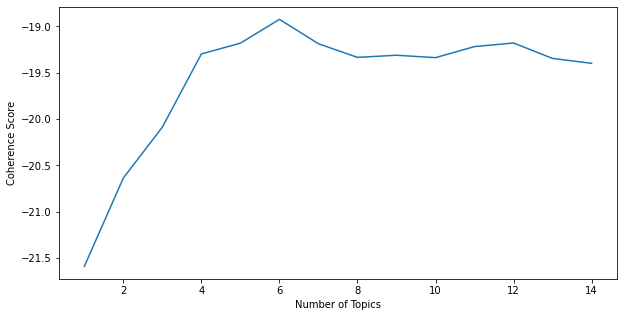

In [82]:
texts_coherence = []
for nb_topics in range(1,15):
    lda = LdaModel(dfb_corpus, num_topics = nb_topics, id2word = dfb_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=dfb_corpus, dictionary=dfb_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    texts_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,15),texts_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [109]:
k = 6
texts_lda = LdaModel(dfb_corpus, num_topics = k, id2word = dfb_dictionary, passes=10)

def plot_top_words(lda=texts_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

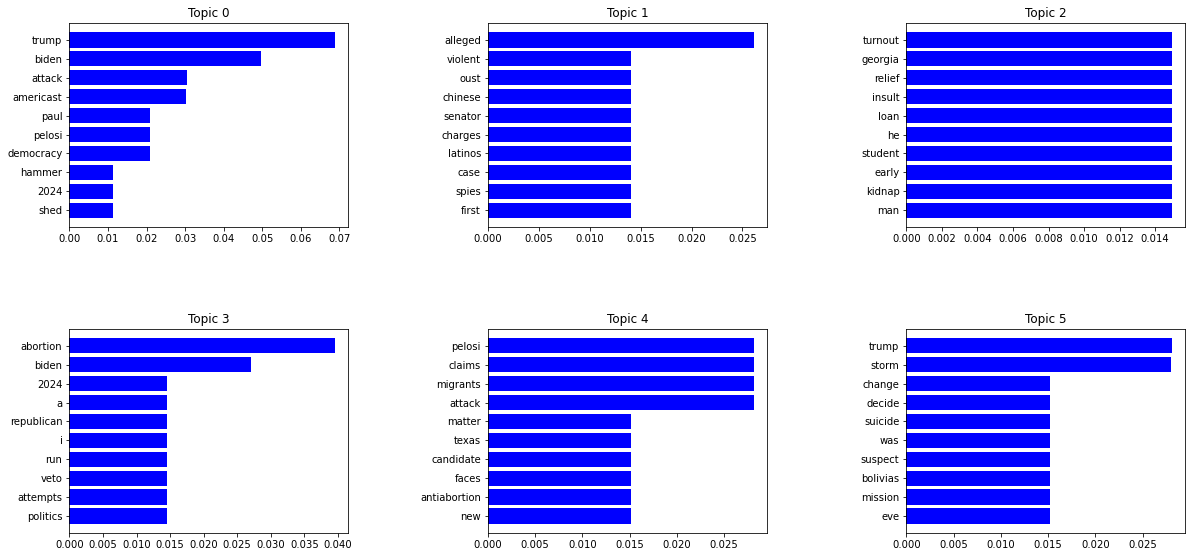

In [110]:
from matplotlib import gridspec
plot_top_words()

# After

In [85]:
dfa = df[df['Date'] >= ('2022-11-08 00:00:00')].reset_index(drop = True)

In [86]:
dfa

,Date,Text
0,2022-11-24 04:12:00,Midterms results in maps and charts
1,2022-11-24 03:53:00,Sarah Palin defeated again in Alaska comeback bid
2,2022-11-19 02:02:00,Lauren Boebert's Democratic challenger concedes
3,2022-11-18 01:35:00,Pelosi stands down as US House Democratic leader
4,2022-11-18 00:13:00,What divided government means for Washington
...,...,...
67,2022-11-08 12:01:00,How has US economy fared under President Biden?
68,2022-11-08 11:10:00,Biden: Democracy is on the ballot in midterms....
69,2022-11-08 10:16:00,Trump: We'll take our White House back. Video
70,2022-11-08 17:00:00,US casting votes as Republicans seek control o...


In [87]:
def cleaner(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [88]:
dfa['Text'] = dfa['Text'].apply(lambda x: cleaner(x))

In [89]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
stop = stopwords.words('english')
dfa['Text'] = dfa['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [91]:
dfa

,Date,Text
0,2022-11-24 04:12:00,Midterms results maps charts
1,2022-11-24 03:53:00,Sarah Palin defeated Alaska comeback bid
2,2022-11-19 02:02:00,Lauren Boebert's Democratic challenger concedes
3,2022-11-18 01:35:00,Pelosi stands US House Democratic leader
4,2022-11-18 00:13:00,What divided government means Washington
...,...,...
67,2022-11-08 12:01:00,How US economy fared President Biden?
68,2022-11-08 11:10:00,Biden: Democracy ballot midterms. Video
69,2022-11-08 10:16:00,Trump: We'll take White House back. Video
70,2022-11-08 17:00:00,US casting votes Republicans seek control Cong...


In [92]:
for i in range(len(dfa)):
    dfa['Text'][i] = dfa['Text'][i].lower()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/677281511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['Text'][i] = dfa['Text'][i].lower()


In [93]:
dfa

,Date,Text
0,2022-11-24 04:12:00,midterms results maps charts
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid
2,2022-11-19 02:02:00,lauren boebert's democratic challenger concedes
3,2022-11-18 01:35:00,pelosi stands us house democratic leader
4,2022-11-18 00:13:00,what divided government means washington
...,...,...
67,2022-11-08 12:01:00,how us economy fared president biden?
68,2022-11-08 11:10:00,biden: democracy ballot midterms. video
69,2022-11-08 10:16:00,trump: we'll take white house back. video
70,2022-11-08 17:00:00,us casting votes republicans seek control cong...


In [94]:
def remove_punct(txt):
    text_nopunct= "".join([char for char in txt if char not in string.punctuation])
    return text_nopunct
dfa['Text']= dfa['Text'].apply(lambda x: remove_punct(x))

In [95]:
dfa

,Date,Text
0,2022-11-24 04:12:00,midterms results maps charts
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid
2,2022-11-19 02:02:00,lauren boeberts democratic challenger concedes
3,2022-11-18 01:35:00,pelosi stands us house democratic leader
4,2022-11-18 00:13:00,what divided government means washington
...,...,...
67,2022-11-08 12:01:00,how us economy fared president biden
68,2022-11-08 11:10:00,biden democracy ballot midterms video
69,2022-11-08 10:16:00,trump well take white house back video
70,2022-11-08 17:00:00,us casting votes republicans seek control cong...


In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hnourbakhsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [97]:
dfa['tokenized_text'] = 0
for i in range(len(dfa)):
    dfa['tokenized_text'][i] = word_tokenize(dfa['Text'][i])

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/4045177643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['tokenized_text'][i] = word_tokenize(dfa['Text'][i])
C:\Users\hnourbakhsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
dfa

,Date,Text,tokenized_text
0,2022-11-24 04:12:00,midterms results maps charts,"[midterms, results, maps, charts]"
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid,"[sarah, palin, defeated, alaska, comeback, bid]"
2,2022-11-19 02:02:00,lauren boeberts democratic challenger concedes,"[lauren, boeberts, democratic, challenger, con..."
3,2022-11-18 01:35:00,pelosi stands us house democratic leader,"[pelosi, stands, us, house, democratic, leader]"
4,2022-11-18 00:13:00,what divided government means washington,"[what, divided, government, means, washington]"
...,...,...,...
67,2022-11-08 12:01:00,how us economy fared president biden,"[how, us, economy, fared, president, biden]"
68,2022-11-08 11:10:00,biden democracy ballot midterms video,"[biden, democracy, ballot, midterms, video]"
69,2022-11-08 10:16:00,trump well take white house back video,"[trump, well, take, white, house, back, video]"
70,2022-11-08 17:00:00,us casting votes republicans seek control cong...,"[us, casting, votes, republicans, seek, contro..."


In [99]:
indices_to_drop = []
for i in range(len(dfa)):
    if len(dfa.tokenized_text[i]) == 0:
        indices_to_drop.append(dfa.index[i])

dfa = dfa.drop(indices_to_drop)
dfa = dfa.reset_index(drop = True)
dfa.head()

,Date,Text,tokenized_text
0,2022-11-24 04:12:00,midterms results maps charts,"[midterms, results, maps, charts]"
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid,"[sarah, palin, defeated, alaska, comeback, bid]"
2,2022-11-19 02:02:00,lauren boeberts democratic challenger concedes,"[lauren, boeberts, democratic, challenger, con..."
3,2022-11-18 01:35:00,pelosi stands us house democratic leader,"[pelosi, stands, us, house, democratic, leader]"
4,2022-11-18 00:13:00,what divided government means washington,"[what, divided, government, means, washington]"


In [100]:
def get_most_freq_words(str, n=None):
    vect = CountVectorizer().fit(str)
    bag_of_words = vect.transform(str)
    sum_words = bag_of_words.sum(axis=0) 
    freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    freq =sorted(freq, key = lambda x: x[1], reverse=True)
    return freq[:n]
  
get_most_freq_words([word for dfa in dfa.tokenized_text for word in dfa],100)

[('us', 17),
 ('video', 11),
 ('election', 11),
 ('trump', 10),
 ('the', 9),
 ('republican', 9),
 ('midterms', 7),
 ('biden', 7),
 ('results', 6),
 ('desantis', 6),
 ('why', 6),
 ('win', 5),
 ('control', 5),
 ('how', 5),
 ('night', 5),
 ('house', 4),
 ('republicans', 4),
 ('senate', 4),
 ('audio', 4),
 ('democratic', 3),
 ('run', 3),
 ('midterm', 3),
 ('arizona', 3),
 ('governor', 3),
 ('anger', 3),
 ('decide', 3),
 ('races', 3),
 ('americast', 3),
 ('congress', 3),
 ('abortion', 3),
 ('votes', 3),
 ('bid', 2),
 ('lauren', 2),
 ('what', 2),
 ('means', 2),
 ('washington', 2),
 ('rise', 2),
 ('trumps', 2),
 ('2024', 2),
 ('speech', 2),
 ('donald', 2),
 ('president', 2),
 ('time', 2),
 ('democracy', 2),
 ('elections', 2),
 ('kari', 2),
 ('lake', 2),
 ('race', 2),
 ('who', 2),
 ('democrats', 2),
 ('key', 2),
 ('coming', 2),
 ('happened', 2),
 ('ron', 2),
 ('florida', 2),
 ('white', 2),
 ('kentucky', 2),
 ('georgia', 2),
 ('bbcs', 2),
 ('challenges', 2),
 ('claims', 2),
 ('four', 2),
 ('wav

In [101]:
words = ['us', 'video', 'election', 'the', 'how', 'why', 'night', 'senate', 'audio', 'run', 'midterm', 
        'decide', 'races', 'votes', 'bid', 'what', 'means', 'time', 'race', 'key', 'coming', 'happened', 'bbcs', 
         'four', 'vote', 'maps', 'charts', 'hour', 'new', 'six', 'ways']

In [102]:
for i in range(len(dfa)):
    dfa.tokenized_text[i] = [x for x in dfa.tokenized_text[i] if x not in words]

dfa.head()

C:\Users\HNOURB~1\AppData\Local\Temp/ipykernel_48428/1506961837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa.tokenized_text[i] = [x for x in dfa.tokenized_text[i] if x not in words]


,Date,Text,tokenized_text
0,2022-11-24 04:12:00,midterms results maps charts,"[midterms, results]"
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid,"[sarah, palin, defeated, alaska, comeback]"
2,2022-11-19 02:02:00,lauren boeberts democratic challenger concedes,"[lauren, boeberts, democratic, challenger, con..."
3,2022-11-18 01:35:00,pelosi stands us house democratic leader,"[pelosi, stands, house, democratic, leader]"
4,2022-11-18 00:13:00,what divided government means washington,"[divided, government, washington]"


In [103]:
dfa

,Date,Text,tokenized_text
0,2022-11-24 04:12:00,midterms results maps charts,"[midterms, results]"
1,2022-11-24 03:53:00,sarah palin defeated alaska comeback bid,"[sarah, palin, defeated, alaska, comeback]"
2,2022-11-19 02:02:00,lauren boeberts democratic challenger concedes,"[lauren, boeberts, democratic, challenger, con..."
3,2022-11-18 01:35:00,pelosi stands us house democratic leader,"[pelosi, stands, house, democratic, leader]"
4,2022-11-18 00:13:00,what divided government means washington,"[divided, government, washington]"
...,...,...,...
67,2022-11-08 12:01:00,how us economy fared president biden,"[economy, fared, president, biden]"
68,2022-11-08 11:10:00,biden democracy ballot midterms video,"[biden, democracy, ballot, midterms]"
69,2022-11-08 10:16:00,trump well take white house back video,"[trump, well, take, white, house, back]"
70,2022-11-08 17:00:00,us casting votes republicans seek control cong...,"[casting, republicans, seek, control, congress]"


In [104]:
dfa_dictionary = Dictionary(dfa.tokenized_text)

In [105]:
dfa_corpus = [dfa_dictionary.doc2bow(text) for text in dfa.tokenized_text]

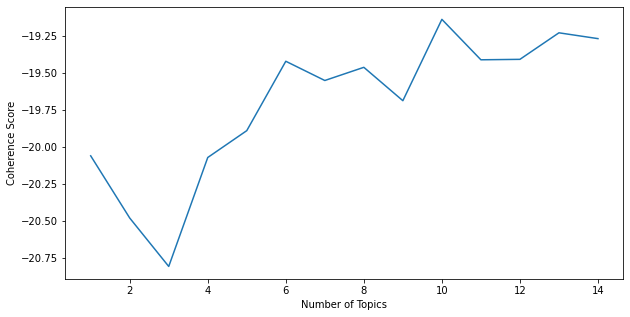

In [106]:
texts_coherence = []
for nb_topics in range(1,15):
    lda = LdaModel(dfa_corpus, num_topics = nb_topics, id2word = dfa_dictionary, passes=10)
    cohm = CoherenceModel(model=lda, corpus=dfa_corpus, dictionary=dfa_dictionary, coherence='u_mass')
    coh = cohm.get_coherence()
    texts_coherence.append(coh)

# visualize coherence
plt.figure(figsize=(10,5))
plt.plot(range(1,15),texts_coherence)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score");

In [111]:
k = 10
texts_lda = LdaModel(dfa_corpus, num_topics = k, id2word = dfa_dictionary, passes=10)

def plot_top_words(lda=texts_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

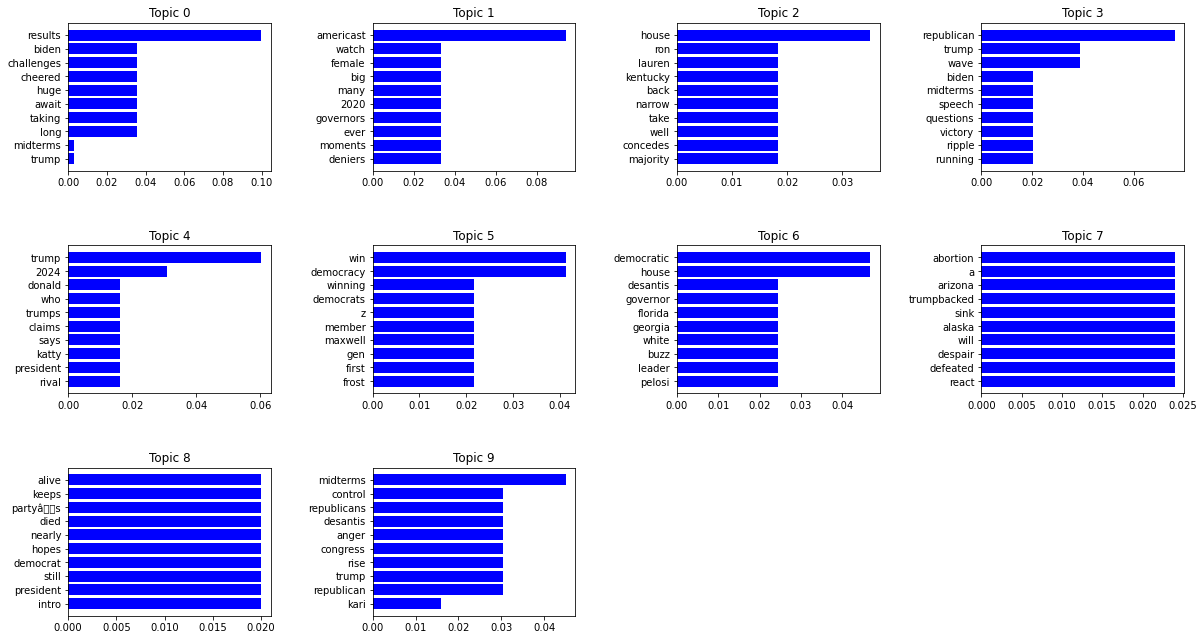

In [112]:
from matplotlib import gridspec
plot_top_words()